# Library

In [1]:
import tweepy as tw
import pandas as pd
import time
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
sns.set(style="darkgrid")
from wordcloud import WordCloud
import re  
import nltk 
nltk.download('stopwords')  
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to C:\Users\Fauzan
[nltk_data]     Kamil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## API Twitter

In [2]:
api_key = "your_api_key"
api_secret_key = "your_api_secret_key"
access_token = "your_access_token"
access_token_secret = "your_access_token_secret"

In [3]:
# Authenticate to Twitter
auth = tw.OAuthHandler(api_key, api_secret_key)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth)

# Scraping Data

In [4]:
# Collect tweets dari user 
#tweets = api.user_timeline(id='aniesbaswedan', count=20)

In [5]:
#for tweet in tweets:
#    print(tweet.text)


In [6]:
search_words = "presiden 2024"
#ate_since = "2023-01-01" or "2023-05-07"
#since=date_since
tweets = []

while len(tweets) < 10000:
    try:
        hasil_search = api.search_tweets(q=search_words, lang="id", count=100, tweet_mode="extended", result_type="recent")
        for tweet in hasil_search:
            tweets.append(tweet)
        print("Jumlah tweet yang diambil: " + str(len(tweets)))
    except tw.TweepError as e:
        print("Error: " + str(e))
        print("Waiting for 15 minutes...")
        time.sleep(60 * 15)

    # Tunggu 5 detik sebelum melanjutkan scraping
    time.sleep(5)

print("Scraping selesai! Total tweets: " + str(len(tweets)))


Jumlah tweet yang diambil: 100
Jumlah tweet yang diambil: 200
Jumlah tweet yang diambil: 300
Jumlah tweet yang diambil: 400
Jumlah tweet yang diambil: 500
Jumlah tweet yang diambil: 600
Jumlah tweet yang diambil: 700
Jumlah tweet yang diambil: 800
Jumlah tweet yang diambil: 900
Jumlah tweet yang diambil: 1000
Jumlah tweet yang diambil: 1100
Jumlah tweet yang diambil: 1200
Jumlah tweet yang diambil: 1300
Jumlah tweet yang diambil: 1400
Jumlah tweet yang diambil: 1500
Jumlah tweet yang diambil: 1600
Jumlah tweet yang diambil: 1700
Jumlah tweet yang diambil: 1800
Jumlah tweet yang diambil: 1900
Jumlah tweet yang diambil: 2000
Jumlah tweet yang diambil: 2100
Jumlah tweet yang diambil: 2200
Jumlah tweet yang diambil: 2300
Jumlah tweet yang diambil: 2400
Jumlah tweet yang diambil: 2500
Jumlah tweet yang diambil: 2600
Jumlah tweet yang diambil: 2700
Jumlah tweet yang diambil: 2800
Jumlah tweet yang diambil: 2900
Jumlah tweet yang diambil: 3000
Jumlah tweet yang diambil: 3100
Jumlah tweet yang

Kode di atas akan terus melakukan scraping hingga jumlah tweet yang diambil mencapai 10000. Jumlah tweet yang diambil pada setiap pengambilan adalah 100, dan diulang dengan jeda 5 detik setiap kali satu pengambilan selesai. Pada saat terjadi error, kode akan menunggu selama 15 menit sebelum melanjutkan scraping kembali. 

## Hasil search

In [7]:
# Buat dataframe dari tweets
df = pd.DataFrame({
    'Tanggal': [tweet.created_at for tweet in tweets],
    'Username': [tweet.user.screen_name for tweet in tweets],
    'Tweet': [tweet.full_text for tweet in tweets],
    'Lokasi': [tweet.user.location for tweet in tweets],
    'Followers': [tweet.user.followers_count for tweet in tweets]
})

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   Tanggal    10000 non-null  datetime64[ns, UTC]
 1   Username   10000 non-null  object             
 2   Tweet      10000 non-null  object             
 3   Lokasi     10000 non-null  object             
 4   Followers  10000 non-null  int64              
dtypes: datetime64[ns, UTC](1), int64(1), object(3)
memory usage: 390.8+ KB


In [9]:
# export ke csv
df.to_csv('hasil_search.csv', index=False)

# Preprocesing Data

## EDA

In [10]:
df.head()

,Tanggal,Username,Tweet,Lokasi,Followers
0,2023-05-07 09:42:29+00:00,enryusan,RT @Adinda_AZahran1: Anies Presiden 2024 \n\nY...,"Jakarta Utara, DKI Jakarta",247
1,2023-05-07 09:42:17+00:00,Bims_D_Boy,RT @Adinda_AZahran1: Anies Presiden 2024 \n\nY...,,76
2,2023-05-07 09:42:04+00:00,sontarsono,RT @Mdy_Asmara1701: Gue Ikhlas Beliau jadi Pre...,brebes,65
3,2023-05-07 09:41:41+00:00,OjolNyambi,RT @Mdy_Asmara1701: Barakallah FII Umrik Pak @...,bandung,392
4,2023-05-07 09:41:34+00:00,MasRahmad121,RT @Mdy_Asmara1701: Mantap! \n\nKomunitas Man...,,439


In [11]:
df.tail()

,Tanggal,Username,Tweet,Lokasi,Followers
9995,2023-05-07 09:36:22+00:00,Nailazaara__,RT @Mira_SasMiita: Sikap profesional Pak @eric...,,6296
9996,2023-05-07 09:36:19+00:00,Mulyawans07gma2,RT @Mdy_Asmara1701: Mantap! \n\nKomunitas Man...,,1159
9997,2023-05-07 09:35:49+00:00,adi_adi22260051,RT @NasDem: Selamat Ulang Tahun Calon Presiden...,,25
9998,2023-05-07 09:35:36+00:00,OjolNyambi,RT @Iwansetiawan512: Selamat Ulang Tahun ( Hap...,bandung,392
9999,2023-05-07 09:35:32+00:00,maselonk,RT @Adinda_AZahran1: Anies Presiden 2024 \n\nY...,,68


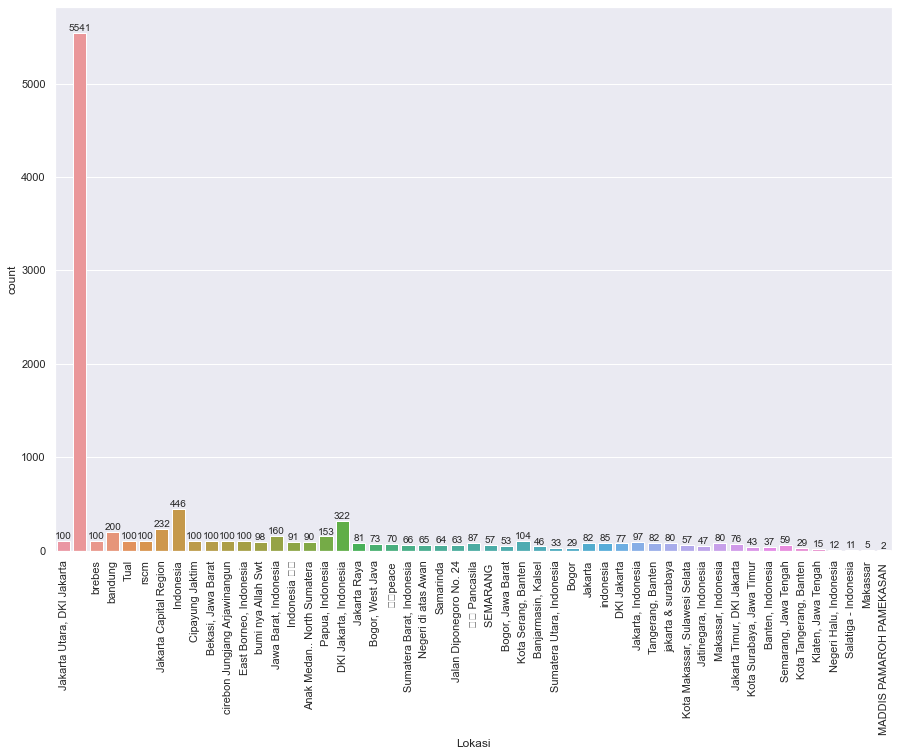

In [12]:
plt.figure(figsize=(15,10))
a = sns.countplot(x='Lokasi' , data=df)
for j in a.containers:
    a.bar_label(j, label_type='edge')
plt.xticks(rotation=90)
plt.show()


## Cleaning Tweet

In [13]:
# Cleaning data
def clean_text(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # hapus @username
    text = re.sub(r'#', '', text) # hapus #
    text = re.sub(r'RT[\s]+', '', text) # hapus RT
    text = re.sub(r'https?:\/\/\S+', '', text) # hapus link
    text = re.sub(r'&amp;', '', text) # hapus &
    text = re.sub(r'\n', '', text) # hapus \n
    text = re.sub(r'[^\w\s]', '', text) # hapus tanda baca
    text = text.lower() # ubah ke huruf kecil
    return text

df['Tweet'] = df['Tweet'].apply(clean_text)
df.head()

,Tanggal,Username,Tweet,Lokasi,Followers
0,2023-05-07 09:42:29+00:00,enryusan,_azahran1 anies presiden 2024 yang setuju rtl ...,"Jakarta Utara, DKI Jakarta",247
1,2023-05-07 09:42:17+00:00,Bims_D_Boy,_azahran1 anies presiden 2024 yang setuju rtl ...,,76
2,2023-05-07 09:42:04+00:00,sontarsono,_asmara1701 gue ikhlas beliau jadi presiden 20...,brebes,65
3,2023-05-07 09:41:41+00:00,OjolNyambi,_asmara1701 barakallah fii umrik pak semoga m...,bandung,392
4,2023-05-07 09:41:34+00:00,MasRahmad121,_asmara1701 mantap komunitas manusia merdeka ...,,439


In [14]:
f=open('stopwords.txt')
ina_stopword = f.read()
ina_stopword = ina_stopword.split('\n')
def remove_stopwords(text):
    text = ' '.join(word for word in text.split() if word not in ina_stopword)
    return text

df['Tweet'] = df['Tweet'].apply(remove_stopwords)
df.head()

,Tanggal,Username,Tweet,Lokasi,Followers
0,2023-05-07 09:42:29+00:00,enryusan,_azahran1 anies presiden 2024 setuju rtl kuy,"Jakarta Utara, DKI Jakarta",247
1,2023-05-07 09:42:17+00:00,Bims_D_Boy,_azahran1 anies presiden 2024 setuju rtl kuy,,76
2,2023-05-07 09:42:04+00:00,sontarsono,_asmara1701 gue ikhlas beliau presiden 2024 ko...,brebes,65
3,2023-05-07 09:41:41+00:00,OjolNyambi,_asmara1701 barakallah fii umrik semoga presid...,bandung,392
4,2023-05-07 09:41:34+00:00,MasRahmad121,_asmara1701 mantap komunitas manusia merdeka m...,,439


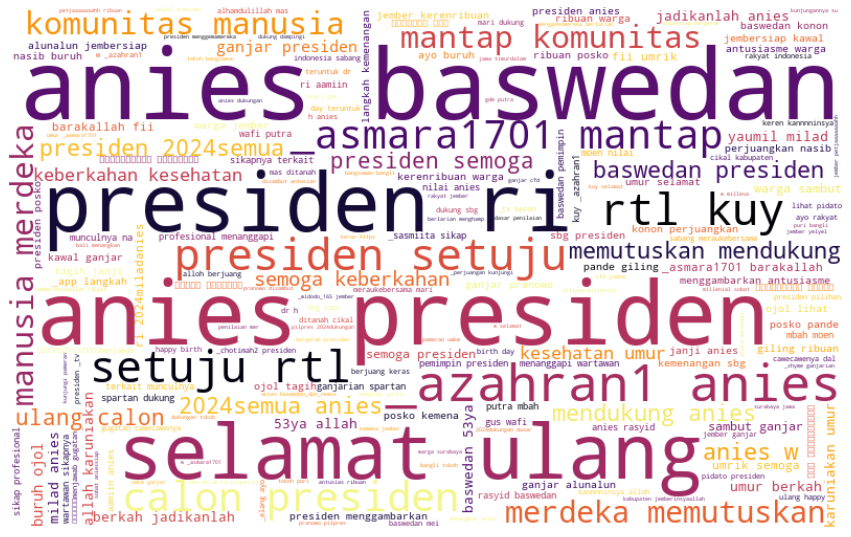

In [15]:
all_words = ' '.join([text for text in df['Tweet']])
wordcloud = WordCloud(width=800, height=500, random_state=True,
                        background_color='white', colormap='inferno',
                        max_font_size=110).generate(all_words)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

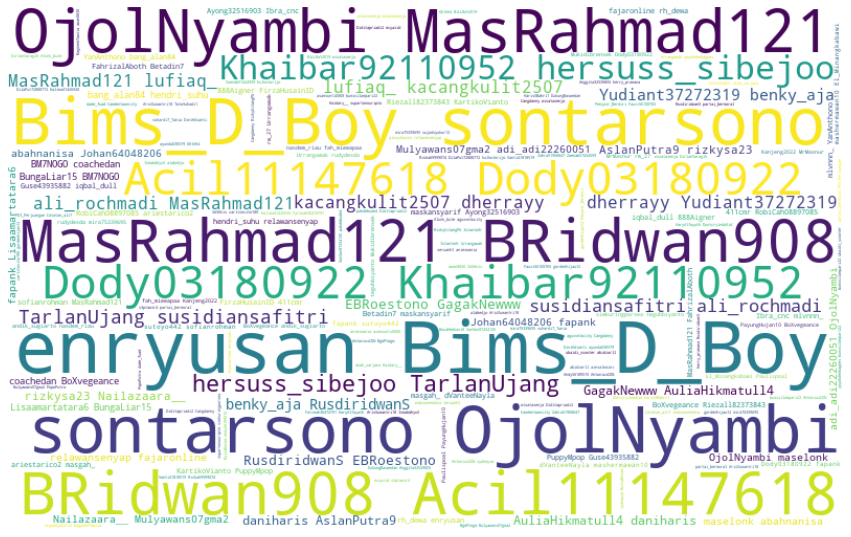

In [16]:
# Wordcloud
all_words = ' '.join([text for text in df['Username']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,
                        background_color='white', colormap='viridis',
                        ).generate(all_words)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [17]:
df.duplicated().sum()

9811

In [18]:
# drop duplicate
df.drop_duplicates(inplace=True)